_Data Understanding_

In [1]:
#import library yang dibutuhkan

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pulp import *

In [2]:
#import data dari menu.csv
df = pd.read_csv('menu.csv')

In [3]:
#menampilkan dataframe menu
pd.set_option('max_columns', None)
df.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,260,87,750,31,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,25,8,770,32,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,45,15,780,33,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,285,95,860,36,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,50,16,880,37,30,10,4,17,2,21,6,0,25,10


In [4]:
#menampilkan nama dan type data pada kolom
df.dtypes

Category                          object
Item                              object
Serving Size                      object
Calories                           int64
Calories from Fat                  int64
Total Fat                        float64
Total Fat (% Daily Value)          int64
Saturated Fat                    float64
Saturated Fat (% Daily Value)      int64
Trans Fat                        float64
Cholesterol                        int64
Cholesterol (% Daily Value)        int64
Sodium                             int64
Sodium (% Daily Value)             int64
Carbohydrates                      int64
Carbohydrates (% Daily Value)      int64
Dietary Fiber                      int64
Dietary Fiber (% Daily Value)      int64
Sugars                             int64
Protein                            int64
Vitamin A (% Daily Value)          int64
Vitamin C (% Daily Value)          int64
Calcium (% Daily Value)            int64
Iron (% Daily Value)               int64
dtype: object

In [5]:
#memeriksa nilai null pada tiap kolom
df.isnull().any()

Category                         False
Item                             False
Serving Size                     False
Calories                         False
Calories from Fat                False
Total Fat                        False
Total Fat (% Daily Value)        False
Saturated Fat                    False
Saturated Fat (% Daily Value)    False
Trans Fat                        False
Cholesterol                      False
Cholesterol (% Daily Value)      False
Sodium                           False
Sodium (% Daily Value)           False
Carbohydrates                    False
Carbohydrates (% Daily Value)    False
Dietary Fiber                    False
Dietary Fiber (% Daily Value)    False
Sugars                           False
Protein                          False
Vitamin A (% Daily Value)        False
Vitamin C (% Daily Value)        False
Calcium (% Daily Value)          False
Iron (% Daily Value)             False
dtype: bool

In [6]:
#deskripsi dasar dari menu
df.describe()

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
mean,368.269231,127.096154,14.165385,21.815385,6.007692,29.965385,0.203846,54.942308,18.392308,495.750000,20.676923,47.346154,15.780769,1.630769,6.530769,29.423077,13.338462,13.426923,8.534615,20.973077,7.734615
std,240.269886,127.875914,14.205998,21.885199,5.321873,26.639209,0.429133,87.269257,29.091653,577.026323,24.034954,28.252232,9.419544,1.567717,6.307057,28.679797,11.426146,24.366381,26.345542,17.019953,8.723263
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,210.000000,20.000000,2.375000,3.750000,1.000000,4.750000,0.000000,5.000000,2.000000,107.500000,4.750000,30.000000,10.000000,0.000000,0.000000,5.750000,4.000000,2.000000,0.000000,6.000000,0.000000
50%,340.000000,100.000000,11.000000,17.000000,5.000000,24.000000,0.000000,35.000000,11.000000,190.000000,8.000000,44.000000,15.000000,1.000000,5.000000,17.500000,12.000000,8.000000,0.000000,20.000000,4.000000
75%,500.000000,200.000000,22.250000,35.000000,10.000000,48.000000,0.000000,65.000000,21.250000,865.000000,36.250000,60.000000,20.000000,3.000000,10.000000,48.000000,19.000000,15.000000,4.000000,30.000000,15.000000
max,1880.000000,1060.000000,118.000000,182.000000,20.000000,102.000000,2.500000,575.000000,192.000000,3600.000000,150.000000,141.000000,47.000000,7.000000,28.000000,128.000000,87.000000,170.000000,240.000000,70.000000,40.000000


In [7]:
#menampilkan korelasi tiap kolom
df.corr()

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
Calories,1.000000,0.904588,0.904409,0.904123,0.845564,0.847631,0.522441,0.596399,0.595208,0.712309,0.713415,0.781539,0.781242,0.538894,0.540014,0.259598,0.787847,0.108844,-0.068747,0.428426,0.643552
Calories from Fat,0.904588,1.000000,0.999663,0.999725,0.847008,0.849592,0.433686,0.682161,0.681607,0.846624,0.847276,0.461672,0.461463,0.581274,0.575621,-0.115285,0.807913,0.056731,-0.087331,0.161034,0.735894
Total Fat,0.904409,0.999663,1.000000,0.999765,0.846707,0.849293,0.431453,0.680547,0.680000,0.846158,0.846780,0.461213,0.461005,0.580837,0.575206,-0.115446,0.807773,0.054434,-0.089354,0.162860,0.734685
Total Fat (% Daily Value),0.904123,0.999725,0.999765,1.000000,0.847379,0.849973,0.433016,0.680940,0.680378,0.846728,0.847368,0.460516,0.460298,0.580592,0.575033,-0.115761,0.807922,0.054038,-0.089353,0.162031,0.735478
Saturated Fat,0.845564,0.847008,0.846707,0.847379,1.000000,0.999279,0.620611,0.631210,0.630334,0.584075,0.585323,0.591261,0.591743,0.351818,0.347152,0.197734,0.603028,0.064972,-0.179672,0.403311,0.578062
Saturated Fat (% Daily Value),0.847631,0.849592,0.849293,0.849973,0.999279,1.000000,0.620210,0.633603,0.632712,0.588694,0.589958,0.591322,0.591655,0.356831,0.351797,0.195928,0.606581,0.065376,-0.178059,0.401139,0.580488
Trans Fat,0.522441,0.433686,0.431453,0.433016,0.620611,0.620210,1.000000,0.253935,0.251502,0.187580,0.188339,0.463250,0.462891,0.054918,0.058301,0.334756,0.388249,0.075833,-0.076612,0.385331,0.325476
Cholesterol,0.596399,0.682161,0.680547,0.680940,0.631210,0.633603,0.253935,1.000000,0.999855,0.624362,0.624743,0.270977,0.272662,0.435575,0.440266,-0.135518,0.561561,0.080239,-0.082978,0.132077,0.655000
Cholesterol (% Daily Value),0.595208,0.681607,0.680000,0.680378,0.630334,0.632712,0.251502,0.999855,1.000000,0.623320,0.623720,0.269300,0.270992,0.434940,0.439814,-0.136459,0.560957,0.080059,-0.083315,0.132382,0.653167
Sodium,0.712309,0.846624,0.846158,0.846728,0.584075,0.588694,0.187580,0.624362,0.623320,1.000000,0.999929,0.200796,0.201032,0.694389,0.689995,-0.426536,0.869802,0.083068,-0.030769,-0.024074,0.871593


In [8]:
#fungsi untuk membuat grafik scatter
def scatter(df, category, x, y):
    return plt.scatter(
    x=df[df['Category'].isin([category])][x],
    y=df[df['Category'].isin([category])][y],alpha=.5
    )

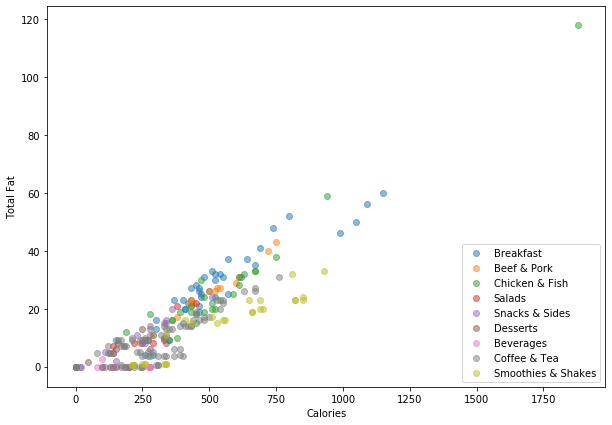

In [9]:
#plotting nilai lemak terhadap kalori

x = 'Calories'
y = 'Total Fat'

fig = plt.figure(figsize=(10,7))
for cat in df.Category.unique().tolist():
    scatter(df, cat, x, y)
plt.legend(df.Category.unique().tolist(), loc='lower right')
plt.xlabel(x)
plt.ylabel(y)
plt.show()

Dari grafik scatter di atas, dapat terlihat terdapat outlier dengan nilai kalori lebih dari 1700.

In [10]:
#menghilangkan menu dengan nilai kalori 1880
df = df[~(df['Calories'] > 1700)]

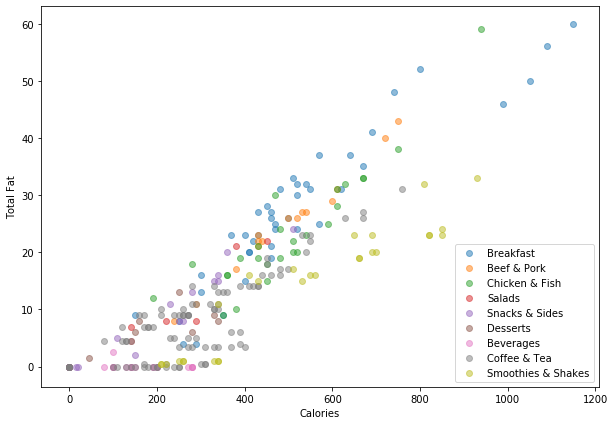

In [11]:
#plotting nilai lemak terhadap kalori

x = 'Calories'
y = 'Total Fat'

fig = plt.figure(figsize=(10,7))
for cat in df.Category.unique().tolist():
    scatter(df, cat, x, y)
plt.legend(df.Category.unique().tolist(), loc='lower right')
plt.xlabel(x)
plt.ylabel(y)
plt.show()

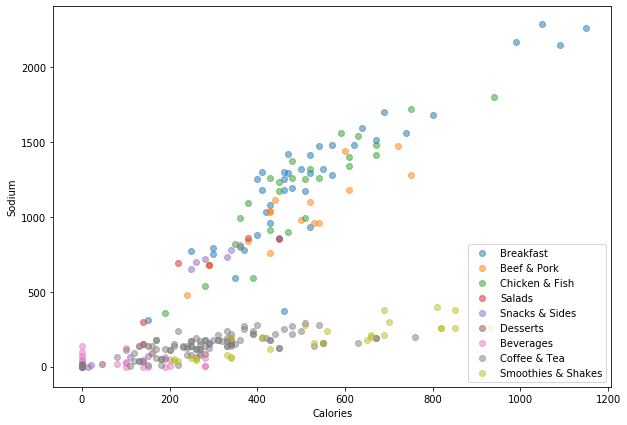

In [12]:
#plotting nilai sodium terhadap kalori

x = 'Calories'
y = 'Sodium'

fig = plt.figure(figsize=(10,7))
for cat in df.Category.unique().tolist():
    scatter(df, cat, x, y)
plt.legend(df.Category.unique().tolist(), loc='lower right')
plt.xlabel(x)
plt.ylabel(y)
plt.show()

_Data Preparation_

In [13]:
#membuat list menu dari item
MenuItems = df.Item.tolist()

#membuat dictionary dari tiap variabel
Calories = df.set_index('Item')['Calories'].to_dict()
TotalFat = df.set_index('Item')['Total Fat'].to_dict()
SaturatedFat = df.set_index('Item')['Saturated Fat'].to_dict()
Carbohydrates = df.set_index('Item')['Carbohydrates'].to_dict()
Sugars = df.set_index('Item')['Sugars'].to_dict()
Protein = df.set_index('Item')['Protein'].to_dict()
Sodium = df.set_index('Item')['Sodium'].to_dict()

In [14]:
#membuat fungsi pengukuran kebutuhan kalori per hari
def calories_calc(sex, weight, height, age, activity_rate=1.6):
    if sex == 'M':
        sum_calories = ((10*weight)+(6.25*height)-(5*age)+5)*activity_rate
        return sum_calories
    if sex == 'F':
        sum_calories = ((10*weight)+(6.25*height)-(5*age)-161)*activity_rate
        return sum_calories

In [15]:
sum_calories = calories_calc('M', 71, 175, 22, 2.0)

In [16]:
sum_calories

3397.5

_Modelling_

In [17]:
#membuat object Linear Programming
prob = LpProblem('Calories_Diet')

In [18]:
MenuItem_vars = LpVariable.dicts('MenuItems',MenuItems, lowBound=0, upBound=10, cat='Integer')

In [19]:
#batasan variabel yang ditentukan

sum_fat = 100
lower_carbo = 200
upper_sugar = 100
lower_protein = 50
sum_sodium = 7000

In [20]:
#menjumlahkan menu sesuai dengan batasan yang telah ditentukan

prob += lpSum([Sugars[i]*MenuItem_vars[i] for i in MenuItems]), 'Sugars'
prob += lpSum([TotalFat[i]*MenuItem_vars[i] for i in MenuItems]) <= sum_fat, 'Total_Fat'
prob += lpSum([Carbohydrates[i]*MenuItem_vars[i] for i in MenuItems]) >= lower_carbo, 'Carbohydrates'
prob += lpSum([Protein[i]*MenuItem_vars[i] for i in MenuItems]) >= lower_protein, 'Protein'
prob += lpSum([Sodium[i]*MenuItem_vars[i] for i in MenuItems]) <= sum_sodium, 'Sodium'
prob += lpSum([Calories[i]*MenuItem_vars[i] for i in MenuItems]) <= sum_calories, 'Calories'

In [21]:
#mengetahui apakah lp sudah terselesaikan atau belum
prob.solve()

1

In [22]:
#menampilkan status dari linear programming
print(LpStatus[prob.status])

Optimal


In [23]:
#membuat matriks untuk menampung menu yang didapat
matrix = []

In [24]:
#looping untuk menambahkan menu ke dalam matriks
for v in prob.variables():
    if v.varValue > 0:
        Item = df.loc[df['Item'] == v.name.replace('MenuItems_','').replace('_',' ')]
        Item_Calories = Item['Calories'].values*v.varValue
        Item_TotalFat = Item['Total Fat'].values*v.varValue
        Item_Carbohydrates = Item['Carbohydrates'].values*v.varValue
        Item_Sugar = Item['Sugars'].values*v.varValue
        Item_Protein = Item['Protein'].values*v.varValue
        Item_Sodium = Item['Sodium'].values*v.varValue
        
        matrix.append([v.name.replace('MenuItems_','').replace('_',' '),v.varValue,Item_Calories[0],Item_TotalFat[0],Item_Carbohydrates[0],Item_Sugar[0],Item_Protein[0],Item_Sodium[0]])

In [25]:
print(matrix)

[['Diet Dr Pepper (Large)', 1.0, 0.0, 0.0, 0.0, 0.0, 4.0, 140.0], ['Diet Dr Pepper (Medium)', 10.0, 0.0, 0.0, 0.0, 0.0, 30.0, 1000.0], ['Diet Dr Pepper (Small)', 1.0, 0.0, 0.0, 0.0, 0.0, 2.0, 70.0], ['Kids French Fries', 10.0, 1100.0, 50.0, 150.0, 0.0, 10.0, 650.0], ['Small French Fries', 2.0, 460.0, 22.0, 60.0, 0.0, 4.0, 260.0]]


In [26]:
#membuat dataframe dari matrix
columns = ['Item', 'Amount', 'Calories', 'Total Fat', 'Carbohydrates', 'Sugar', 'Protein', 'Sodium']
menu = pd.DataFrame(matrix, columns=columns)
menu

,Item,Amount,Calories,Total Fat,Carbohydrates,Sugar,Protein,Sodium
0,Diet Dr Pepper (Large),1.0,0.0,0.0,0.0,0.0,4.0,140.0
1,Diet Dr Pepper (Medium),10.0,0.0,0.0,0.0,0.0,30.0,1000.0
2,Diet Dr Pepper (Small),1.0,0.0,0.0,0.0,0.0,2.0,70.0
3,Kids French Fries,10.0,1100.0,50.0,150.0,0.0,10.0,650.0
4,Small French Fries,2.0,460.0,22.0,60.0,0.0,4.0,260.0
